In [ ]:
import warnings, os
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
import gc

warnings.filterwarnings('ignore')

# Download

In [ ]:
# import MetaTrader5 as mt5

In [ ]:
# RICO_REAL   = { 'login':16331371,   'password':'#000000Zz', 'server':'Rico-PRD'                 }
# CLEAR_REAL  = { 'login':1018156111, 'password':'#000000Zz', 'server':'ClearInvestimentos-CLEAR' }

# PATH_1 = r'C:\Program Files\MetaTrader 5 _1\terminal64.exe'

# assert mt5.initialize(PATH_1, **CLEAR_REAL)

In [ ]:
# def MT5_LOAD_DATA(SYMBOLS, TFRAMES, start_pos=0, count=99_999):
#     Pipe = []
#     for (symbol, TF) in it.product(SYMBOLS, TFRAMES):
#         timeframe = { 'M1':mt5.TIMEFRAME_M1, 'M5':mt5.TIMEFRAME_M5, 'M10':mt5.TIMEFRAME_M10, 'M15':mt5.TIMEFRAME_M15, 'M20':mt5.TIMEFRAME_M20, 'M30':mt5.TIMEFRAME_M30, 'H1':mt5.TIMEFRAME_H1, 'H2':mt5.TIMEFRAME_H2, 'H3':mt5.TIMEFRAME_H3, 'H4':mt5.TIMEFRAME_H4, 'H6':mt5.TIMEFRAME_H6, 'H8':mt5.TIMEFRAME_H8, 'H12':mt5.TIMEFRAME_H12, 'D1':mt5.TIMEFRAME_D1, 'W1':mt5.TIMEFRAME_W1 }[TF]
#         Raw       = pd.DataFrame(mt5.copy_rates_from_pos(symbol, timeframe, start_pos, count))
#         Raw.insert(0, 'a',          Raw.index + 1)
#         Raw.insert(1, 'z',          Raw.index - Raw.index.max())
#         Raw.insert(2, 'symbol',     symbol)
#         Raw.insert(3, 'tf',         TF)
#         Raw.insert(4, 'datetime',   pd.to_datetime(Raw['time'], unit='s'))
#         Pipe.append(Raw)
#     pass
#     return pd.concat(Pipe, ignore_index=1)

# Raw = MT5_LOAD_DATA(SYMBOLS=['WIN$','WIN$D','WIN$N'], TFRAMES=['M15','H1','D1'])
# Raw.head()

In [ ]:
# Raw.to_csv(f'Storage/Raw.csv', index=False)

# Load

In [ ]:
Raw = pd.read_csv('Storage/Raw.csv', parse_dates=['datetime'])
Raw.head()

In [ ]:
def QUERY_SELECT(Raw, SYMBOLS, TFRAMES):
    return Raw[Raw['symbol'].isin(SYMBOLS) & Raw['tf'].isin(TFRAMES)] .reset_index(drop=1)

Query = QUERY_SELECT(Raw, SYMBOLS=['WIN$','WIN$D','WIN$N'], TFRAMES=['M15'])
Query.head()

# Charts - Normal

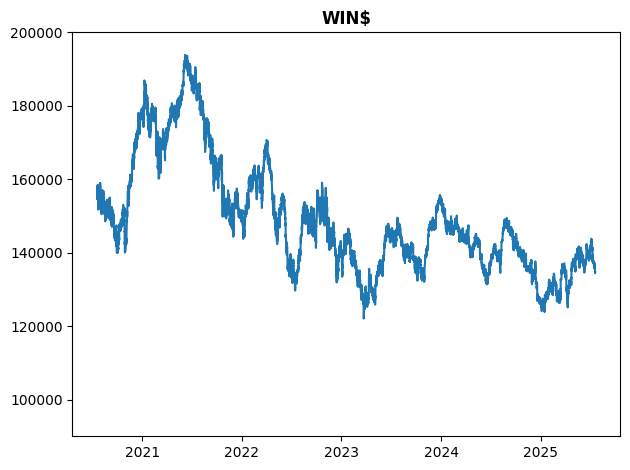

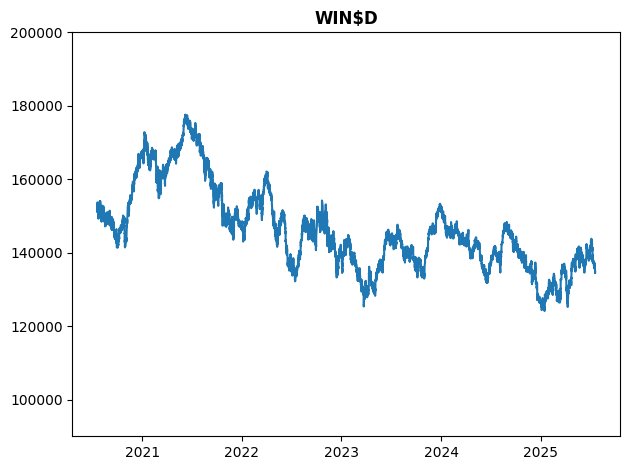

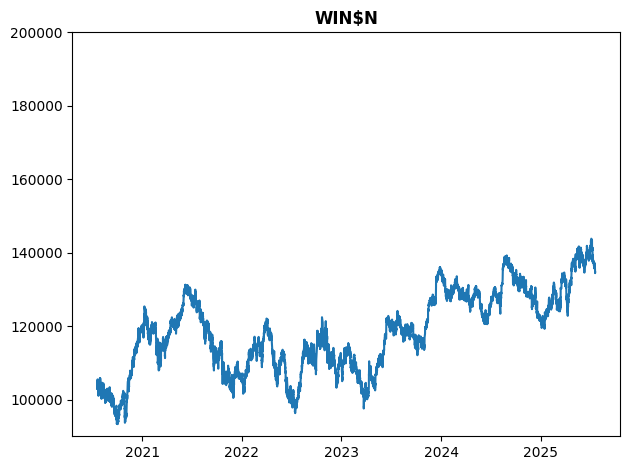

In [36]:
for SYMBOL, Sec in Query.groupby('symbol', sort=0):

    plt.title(f'{SYMBOL}', fontweight='bold')
    plt.plot(Sec['datetime'], Sec['close']) 
    plt.ylim(bottom=90_000, top=200_000)
    plt.tight_layout()
    # plt.savefig(os.path.join(f'Charts/{SYMBOL}.png'), bbox_inches='tight')
    plt.show()

# Charts - Log

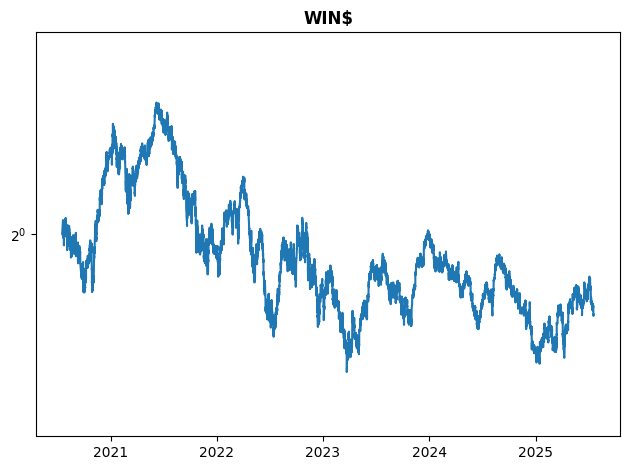

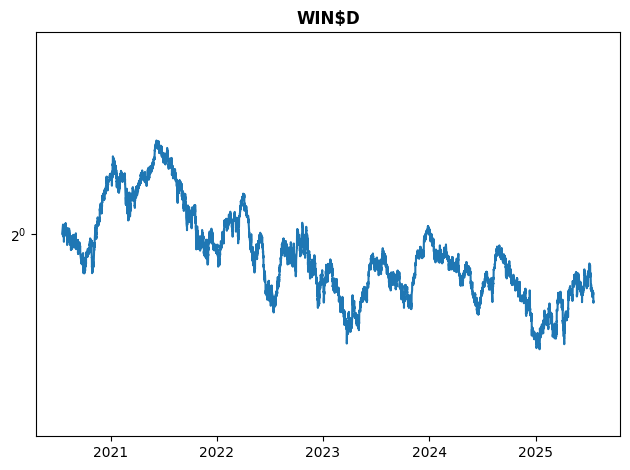

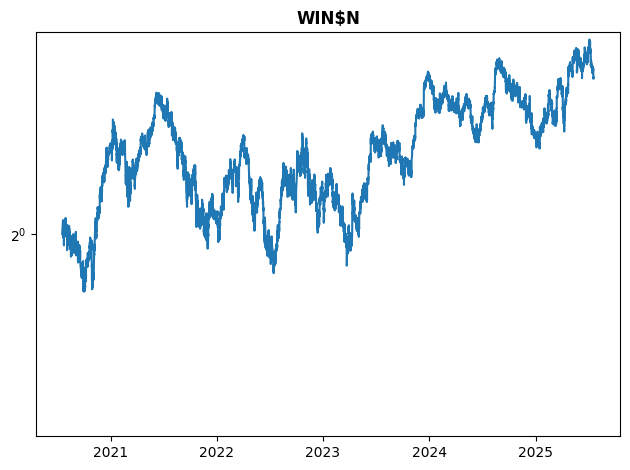

In [35]:
for SYMBOL, Sec in Query.groupby('symbol', sort=0):

    plt.title(f'{SYMBOL}', fontweight='bold')
    plt.plot(Sec['datetime'], Sec['close']/Sec['close'].iloc[0])
    plt.yscale('log', base=2)
    plt.ylim(bottom=2**(-0.5), top=2**(+0.5))
    plt.tight_layout()
    plt.savefig(os.path.join(f'Charts/{SYMBOL}.png'), bbox_inches='tight')
    plt.show()